In [41]:
# Here we want to analyse the metadata about the training data we obtained
import os
from PIL import Image
import pandas as pd
import seaborn as sns

raws_directory = os.path.join(os.getcwd(), "../data/raw")
raw_images = []

with os.scandir(raws_directory) as items:
    for item in items:
        if item.is_dir(): continue
        try:
            tmp_img = Image.open(item.path)
            raw_images.append(item)
        except IOError:
            print(f"{item.name} is not a valid image file")
               

In [107]:
# Let's figure out the basic items first:
# Image size, width, height

# Image dataframe:
# Filename | Size | Width | Height

# Quick and Dirty way to setup dataframe with appropriate data
image_df = pd.DataFrame(columns=["ImageName", "Size (Bytes)", "Width", "Height"])

image_filenames = []
image_sizes = []
image_widths = []
image_heights = []

for image in raw_images:
    img_size = image.stat().st_size
    image_filenames.append(image.name)
    image_sizes.append(img_size)
    try:
        tmp_img = Image.open(image.path)
        image_widths.append(tmp_img.width)
        image_heights.append(tmp_img.height)
    except:
        image_widths = float("nan")
        image_heights = float("nan")
        

image_df["ImageName"] = pd.Series(image_filenames)
image_df["Size (Bytes)"] = pd.Series(image_sizes)
image_df["Width"] = pd.Series(image_widths)
image_df["Height"] = pd.Series(image_heights)

print(image_df.head(10))

                                      ImageName  Size (Bytes)  Width  Height
0  0007922c5bdf7b922d029b5acaccd502fe679e67.jpg        441729   2316    1536
1  001444a0a529d43174ed7bd80936c692855f63a2.jpg       1022806   2432    3668
2  001f419cb7003a0b9e5d73755db1992daea12bb6.jpg        650132   2432    1560
3  003d2335704e4ebcc745751cac75cc95860124b9.jpg        494159   2432    1622
4  0046f51c15cdeb6dec026a376a5afffb8e28f68a.jpg        370269   1975    1317
5  009aeb3c6762f701597dffd3375c5906e1d1a155.jpg        599555   2432    1612
6  00cf6a7859d19a67852d00e2decd49c0b876bffd.jpg        461272   1840    1232
7  011331baebe88f0da4f94a7b1c9370f924840434.jpg         97509    995    1500
8  0129417b94d89bf4c8d2543f3427775ee4fc46ff.jpg        242944   2048    1407
9  01755e464a93f61d362741169a60ac05840356f1.jpg        431688   2000    1324


<AxesSubplot:xlabel='Size (Bytes)', ylabel='Count'>

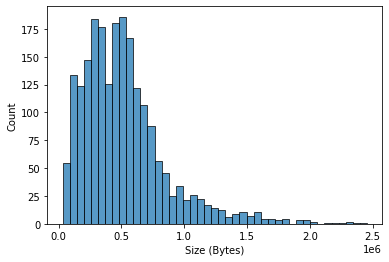

In [106]:
# Using the above data, we create a histogram to visualize data statistics
sns.histplot(data=image_df, x="Size (Bytes)")

<AxesSubplot:xlabel='Width', ylabel='Count'>

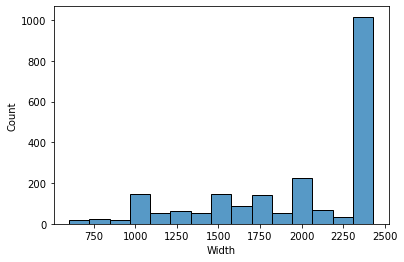

In [105]:
sns.histplot(data=image_df, x="Width")

<AxesSubplot:xlabel='Height', ylabel='Count'>

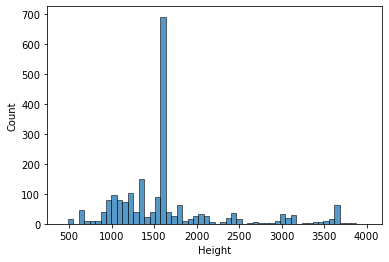

In [103]:
sns.histplot(data=image_df, x="Height")

In [ ]:
# Here we want to categorize the images into buckets with regards to their content